In [1]:
# Imports
import pandas as pd
import numpy as np
import catboost as cb
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from pulearn import BaggingPuClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, normalized_mutual_info_score

In [2]:
# read the dataset
df = pd.read_csv('cleaned-dataset.csv' , encoding='latin-1')

In [3]:
# Examine the first few rows of the dataframe
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

In [5]:
# Examine the missing data
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
# Scatter plots for all features
num_columns = len(df.columns)  

for i in range(num_columns):
    for j in range(i+1, num_columns):
        column1 = df.columns[i]
        column2 = df.columns[j]

        plt.scatter(df[column1], df[column2])
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(f'Scatter Plot: {column1} vs {column2}')
        plt.show()

In [ ]:
pip install catboost scikit-learn

In [6]:
from sklearn.metrics import f1_score

# Load the data and prepare it
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to convert the data
label_mapping = {"Dropout": 0, "Graduate": 1}

# Applying Label Mapping Function to Training and Test Data
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)

# Training with CatBoost
catboost_model = CatBoostClassifier(iterations=150, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='F1')
catboost_model.fit(X_train, y_train)

# CatBoost Model Prediction on Test Dataset
catboost_predictions = catboost_model.predict(X_test)

# Evaluation the CatBoost model with F1-score
f1_catboost = f1_score(y_test, catboost_predictions)



0:	learn: 0.9017178	total: 155ms	remaining: 23s
1:	learn: 0.9204021	total: 166ms	remaining: 12.3s
2:	learn: 0.9198381	total: 178ms	remaining: 8.73s
3:	learn: 0.9218708	total: 185ms	remaining: 6.74s
4:	learn: 0.9227445	total: 196ms	remaining: 5.68s
5:	learn: 0.9242383	total: 207ms	remaining: 4.98s
6:	learn: 0.9268689	total: 219ms	remaining: 4.47s
7:	learn: 0.9285132	total: 231ms	remaining: 4.09s
8:	learn: 0.9274017	total: 242ms	remaining: 3.79s
9:	learn: 0.9287656	total: 254ms	remaining: 3.55s
10:	learn: 0.9271343	total: 265ms	remaining: 3.34s
11:	learn: 0.9295621	total: 276ms	remaining: 3.17s
12:	learn: 0.9313725	total: 287ms	remaining: 3.03s
13:	learn: 0.9315143	total: 299ms	remaining: 2.9s
14:	learn: 0.9302832	total: 310ms	remaining: 2.79s
15:	learn: 0.9309309	total: 322ms	remaining: 2.7s
16:	learn: 0.9302452	total: 334ms	remaining: 2.61s
17:	learn: 0.9309309	total: 346ms	remaining: 2.53s
18:	learn: 0.9325689	total: 357ms	remaining: 2.46s
19:	learn: 0.9340240	total: 369ms	remaining: 

In [7]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, catboost_predictions)
recall = recall_score(y_test, catboost_predictions)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8956158663883089
Recall: 0.955456570155902


In [8]:
from sklearn.metrics import accuracy_score, f1_score, normalized_mutual_info_score

catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print('CatBoost Accuracy:', catboost_accuracy)

#  F1-score
f1 = f1_score(y_test,  catboost_predictions)
print('F1-score:', f1)

# Normalized Mutual Information - NMI
nmi = normalized_mutual_info_score(y_test,  catboost_predictions)
print('NMI:', nmi)

CatBoost Accuracy: 0.9035812672176309
F1-score: 0.9245689655172414
NMI: 0.5335344614957301


In [9]:
# Calculate error rate
catboost_error_rate = 1 - catboost_accuracy

print('CatBoost Error Rate:', catboost_error_rate)

CatBoost Error Rate: 0.09641873278236912


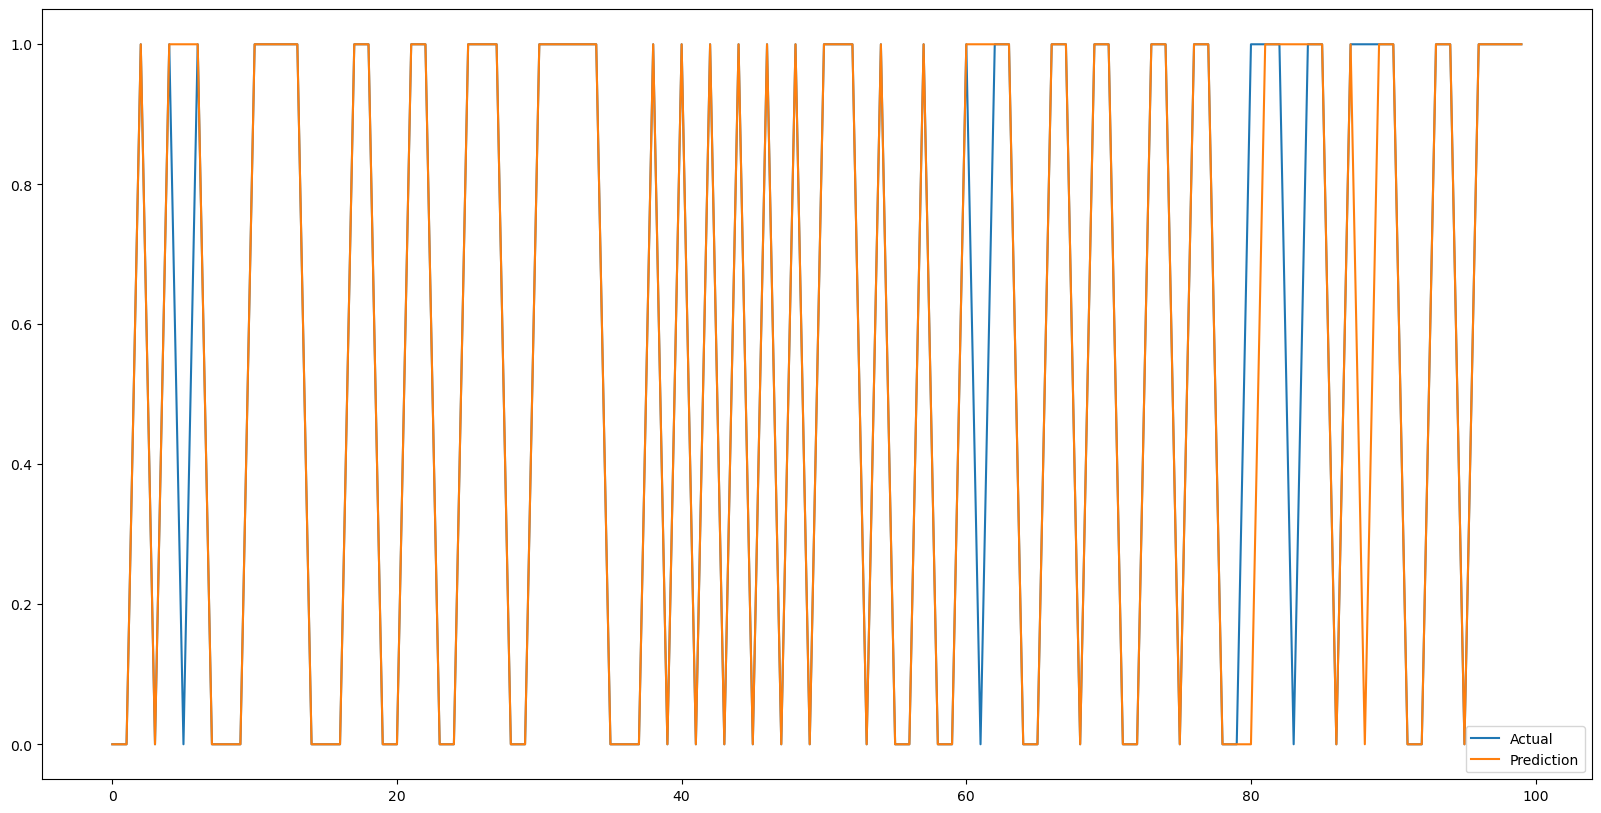

In [10]:
L = 100
plt.figure(figsize=(20, 10))
plt.plot(range(L), y_test.values[1:L+1], range(L), catboost_predictions[1:L+1])
plt.legend(['Actual', 'Prediction'])
plt.show()

In [11]:
# Create CatBoost classifier model
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
catboost_classifier.fit(X_train, y_train)

# Make predictions for Tuition Fees Up to Date
tuition_fees_predictions = catboost_classifier.predict(X_test)

print(tuition_fees_predictions)

0:	learn: 0.6067244	total: 2.38ms	remaining: 236ms
1:	learn: 0.5252229	total: 4.75ms	remaining: 233ms
2:	learn: 0.4643843	total: 7.29ms	remaining: 236ms
3:	learn: 0.4266847	total: 9.61ms	remaining: 231ms
4:	learn: 0.3897801	total: 11.9ms	remaining: 226ms
5:	learn: 0.3621441	total: 14.1ms	remaining: 220ms
6:	learn: 0.3439466	total: 16.2ms	remaining: 215ms
7:	learn: 0.3269843	total: 18.3ms	remaining: 211ms
8:	learn: 0.3122034	total: 20.5ms	remaining: 207ms
9:	learn: 0.3002865	total: 22.7ms	remaining: 204ms
10:	learn: 0.2909010	total: 24.8ms	remaining: 201ms
11:	learn: 0.2828336	total: 27ms	remaining: 198ms
12:	learn: 0.2769440	total: 29.1ms	remaining: 195ms
13:	learn: 0.2714568	total: 31.3ms	remaining: 192ms
14:	learn: 0.2664957	total: 33.5ms	remaining: 190ms
15:	learn: 0.2621499	total: 35.7ms	remaining: 187ms
16:	learn: 0.2572586	total: 37.8ms	remaining: 185ms
17:	learn: 0.2543685	total: 39.9ms	remaining: 182ms
18:	learn: 0.2505180	total: 42ms	remaining: 179ms
19:	learn: 0.2477988	total

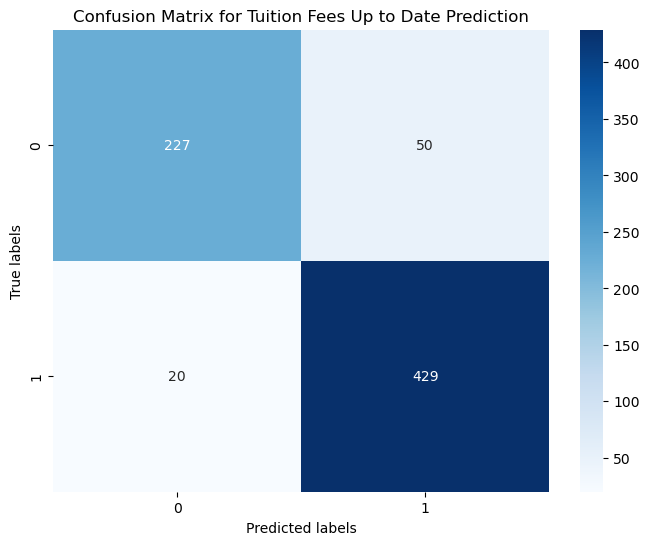

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix
conf_matrix = confusion_matrix(y_test, tuition_fees_predictions)

# confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Tuition Fees Up to Date Prediction')
plt.show()

In [13]:
# CatBoost classifier model
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
catboost_classifier.fit(X_train, y_train)

# predictions for Courses
Course_predictions = catboost_classifier.predict(X_test)

print(Course_predictions)

0:	learn: 0.6067244	total: 2.21ms	remaining: 219ms
1:	learn: 0.5252229	total: 4.58ms	remaining: 225ms
2:	learn: 0.4643843	total: 6.68ms	remaining: 216ms
3:	learn: 0.4266847	total: 8.68ms	remaining: 208ms
4:	learn: 0.3897801	total: 10.8ms	remaining: 204ms
5:	learn: 0.3621441	total: 12.9ms	remaining: 203ms
6:	learn: 0.3439466	total: 15ms	remaining: 199ms
7:	learn: 0.3269843	total: 17.1ms	remaining: 197ms
8:	learn: 0.3122034	total: 19.2ms	remaining: 195ms
9:	learn: 0.3002865	total: 21.3ms	remaining: 192ms
10:	learn: 0.2909010	total: 23.4ms	remaining: 189ms
11:	learn: 0.2828336	total: 25.5ms	remaining: 187ms
12:	learn: 0.2769440	total: 27.6ms	remaining: 185ms
13:	learn: 0.2714568	total: 29.7ms	remaining: 183ms
14:	learn: 0.2664957	total: 31.8ms	remaining: 180ms
15:	learn: 0.2621499	total: 33.9ms	remaining: 178ms
16:	learn: 0.2572586	total: 35.9ms	remaining: 175ms
17:	learn: 0.2543685	total: 38ms	remaining: 173ms
18:	learn: 0.2505180	total: 40ms	remaining: 171ms
19:	learn: 0.2477988	total: 

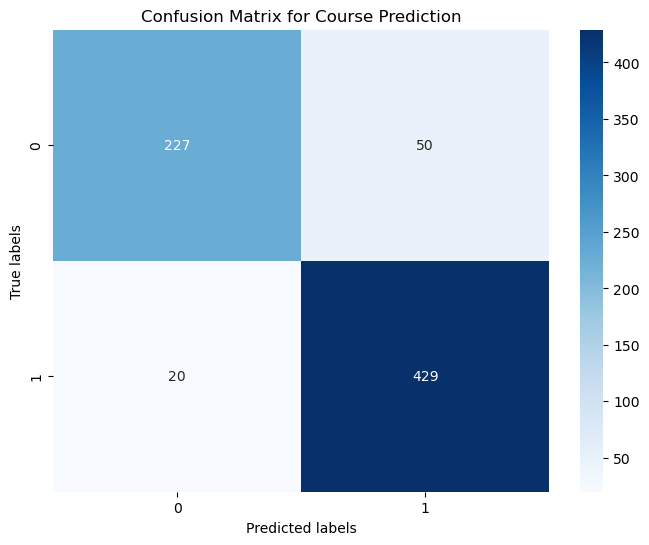

In [14]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, Course_predictions)

# confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Course Prediction')
plt.show()

In [15]:
# CatBoost classifier model
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
catboost_classifier.fit(X_train, y_train)

# predictions for Curricular units 2nd sem (approved)
curricular_units_predictions = catboost_classifier.predict(X_test)

print(curricular_units_predictions)

0:	learn: 0.6067244	total: 2.4ms	remaining: 237ms
1:	learn: 0.5252229	total: 4.63ms	remaining: 227ms
2:	learn: 0.4643843	total: 6.69ms	remaining: 216ms
3:	learn: 0.4266847	total: 8.87ms	remaining: 213ms
4:	learn: 0.3897801	total: 10.9ms	remaining: 207ms
5:	learn: 0.3621441	total: 13ms	remaining: 204ms
6:	learn: 0.3439466	total: 15.1ms	remaining: 200ms
7:	learn: 0.3269843	total: 17.1ms	remaining: 197ms
8:	learn: 0.3122034	total: 19.2ms	remaining: 195ms
9:	learn: 0.3002865	total: 21.3ms	remaining: 192ms
10:	learn: 0.2909010	total: 23.3ms	remaining: 189ms
11:	learn: 0.2828336	total: 25.3ms	remaining: 186ms
12:	learn: 0.2769440	total: 27.4ms	remaining: 183ms
13:	learn: 0.2714568	total: 29.4ms	remaining: 181ms
14:	learn: 0.2664957	total: 31.5ms	remaining: 178ms
15:	learn: 0.2621499	total: 33.5ms	remaining: 176ms
16:	learn: 0.2572586	total: 35.5ms	remaining: 173ms
17:	learn: 0.2543685	total: 37.6ms	remaining: 171ms
18:	learn: 0.2505180	total: 39.7ms	remaining: 169ms
19:	learn: 0.2477988	tota

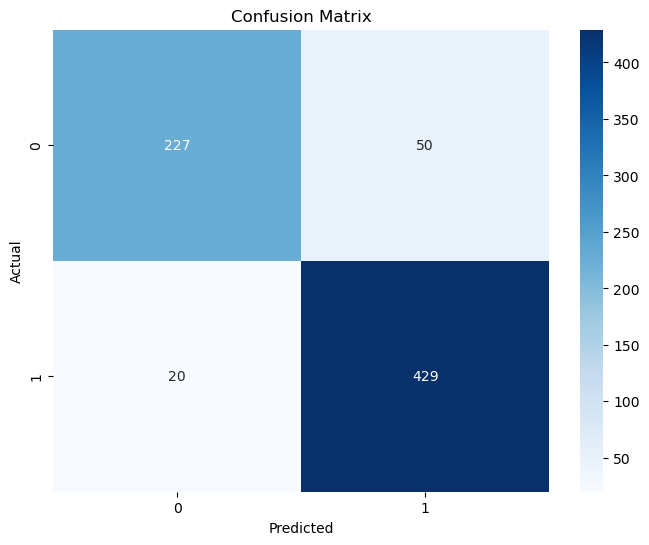

In [16]:
# confusion matrix
cm = confusion_matrix(y_test, curricular_units_predictions)

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Split the data 
X = df.drop('Target', axis=1)
y = df['Target']

In [18]:
# Split data
X = df.drop('Target', axis=1)
y = df['Target']

# Size of labeled and unlabeled data
num_labeled = 3539
num_unlabeled = 885
num_features = X.shape[1]
pos_rate = 0.25

# Generate dummy labeled and unlabeled data
X_labeled = np.random.rand(num_labeled, num_features)
X_unlabeled = np.random.rand(num_unlabeled, num_features)

y_labeled = np.random.choice([0, 1], size=num_labeled, p=[1-pos_rate, pos_rate])
y_unlabeled = np.random.choice([0, 1], size=num_unlabeled, p=[1-pos_rate, pos_rate])

# Shuffle
X_labeled, y_labeled = shuffle(X_labeled, y_labeled)
X_unlabeled, y_unlabeled = shuffle(X_unlabeled, y_unlabeled)

# Print output
print(f"X labeled: {X_labeled.shape[0]} data points and {X_labeled.shape[1]} features")
print(f"X unlabeled: {X_unlabeled.shape[0]} data points and {X_unlabeled.shape[1]} features")

print(f"y labeled: {y_labeled.sum()} positive out of {len(y_labeled)} total")
print(f"y unlabeled: {y_unlabeled.sum()} positive out of {len(y_unlabeled)} total")

X labeled: 3539 data points and 36 features
X unlabeled: 885 data points and 36 features
y labeled: 860 positive out of 3539 total
y unlabeled: 207 positive out of 885 total


In [19]:
# Split the data to train and test
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Convert the labeles: 'Dropout' to 0 and 'Graduate' to 1
label_map = {'Dropout': 0, 'Graduate': 1}
y_train_labeled = y_train.map(label_map)

# Create the LabelSpreading model
model = LabelSpreading(kernel='knn', n_neighbors=5)
model.fit(X_train, y_train_labeled)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test.map(label_map), y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7424242424242424


In [20]:
LabelSpreading_accuracy = accuracy_score(y_test.map(label_map), y_pred)
print('LabelSpreading Accuracy:', accuracy)

#  F1-score
f1 = f1_score(y_test.map(label_map), y_pred)
print('F1-score:', f1)

# Normalized Mutual Information - NMI
nmi = normalized_mutual_info_score(y_test.map(label_map), y_pred)
print('NMI:', nmi)

LabelSpreading Accuracy: 0.7424242424242424
F1-score: 0.80042689434365
NMI: 0.1545272645202353


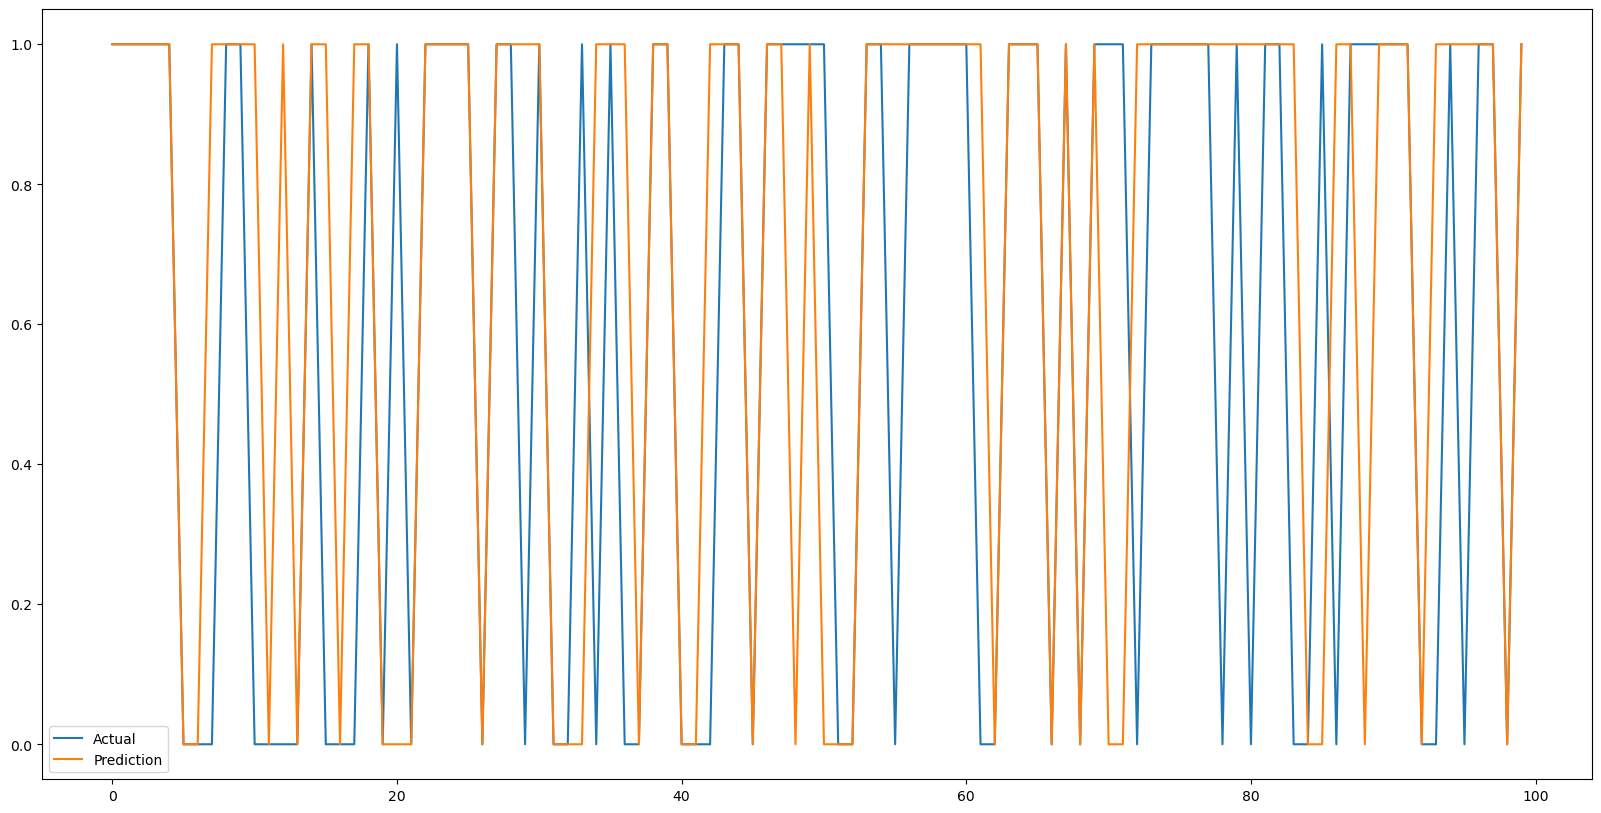

In [21]:
L = 100
plt.figure(figsize=(20, 10))
plt.plot(range(L), y_test.map(label_map).values[1:L+1], range(L), y_pred[1:L+1])
plt.legend(['Actual', 'Prediction'])
plt.show()

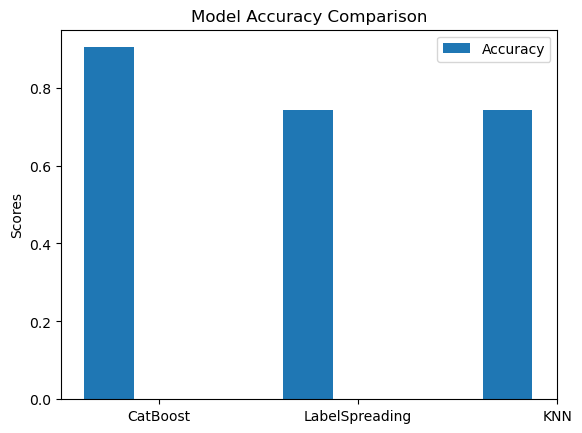

In [22]:
models = ['CatBoost', 'LabelSpreading', 'KNN']
scores = [catboost_accuracy, LabelSpreading_accuracy, accuracy]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, scores, width, label='Accuracy')

ax.set_ylabel('Scores')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [23]:
# Training with the CatBoost algorithm
catboost_model = CatBoostClassifier(iterations=150, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='F1')
catboost_model.fit(X_train, y_train)

# Imporatance of each feature
feature_importances = catboost_model.get_feature_importance()

# Examine the results
fi_df = pd.DataFrame({'feature':list(X_train.columns), 'importance':feature_importances})

# Sort by importance
fi_df = fi_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Print the results
print(fi_df)

0:	learn: 0.9076087	total: 12.7ms	remaining: 1.89s
1:	learn: 0.9266030	total: 24.6ms	remaining: 1.82s
2:	learn: 0.9236167	total: 36.1ms	remaining: 1.77s
3:	learn: 0.9234914	total: 43.1ms	remaining: 1.57s
4:	learn: 0.9222882	total: 54.4ms	remaining: 1.58s
5:	learn: 0.9238633	total: 65.8ms	remaining: 1.58s
6:	learn: 0.9238633	total: 78ms	remaining: 1.59s
7:	learn: 0.9263953	total: 89.8ms	remaining: 1.59s
8:	learn: 0.9279523	total: 102ms	remaining: 1.59s
9:	learn: 0.9266973	total: 113ms	remaining: 1.59s
10:	learn: 0.9271452	total: 126ms	remaining: 1.59s
11:	learn: 0.9297297	total: 138ms	remaining: 1.58s
12:	learn: 0.9330079	total: 150ms	remaining: 1.58s
13:	learn: 0.9338395	total: 162ms	remaining: 1.57s
14:	learn: 0.9344173	total: 174ms	remaining: 1.57s
15:	learn: 0.9351777	total: 186ms	remaining: 1.56s
16:	learn: 0.9341642	total: 188ms	remaining: 1.47s
17:	learn: 0.9343462	total: 193ms	remaining: 1.41s
18:	learn: 0.9353261	total: 204ms	remaining: 1.41s
19:	learn: 0.9357201	total: 217ms	r

In [24]:
# read the dataset
df  = pd.read_csv("data.csv", sep=';')
target_mapping = {'Dropout': 0, 'Enrolled': -1, 'Graduate': 1}

df['Target'] = df['Target'].map(target_mapping)
df = df[df['Target'] != -1]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

In [26]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


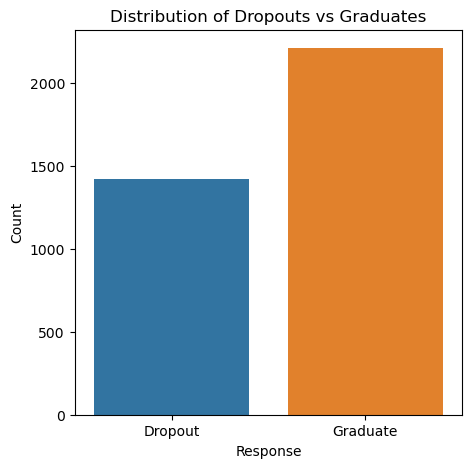

In [55]:
sns.countplot(x='Target', data=df)
plt.title('Distribution of Dropouts vs Graduates')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Dropout', 'Graduate'])
plt.show()

C:\Users\boman\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\boman\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


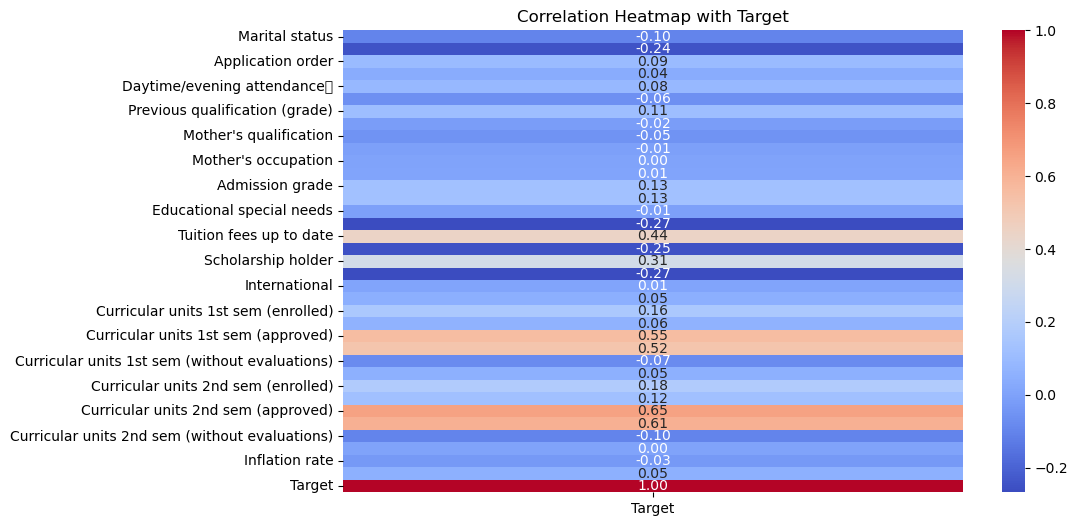

In [27]:
target_column = 'Target'

# calculate the correlation matrix
correlation_matrix = df.corr()

# create a data frame with only target correlations
target_corr_df = correlation_matrix[[target_column]]

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(target_corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap with {target_column}')
plt.show()

In [28]:
X = df.drop("Target", axis=1) # predictors
y = df["Target"] # response

print(df["Target"])

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64


In [29]:
# Split the data into labeled and unlabeled
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Create logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_labeled, y_labeled)

# Make predictions on the test set
preds = logistic_reg_model.predict(X_unlabeled)

# Evaluate the model
acc = accuracy_score(y_unlabeled, preds)
conf_matrix = confusion_matrix(y_unlabeled, preds)
classification_rep = classification_report(y_unlabeled, preds)

print(f'Accuracy: {acc}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8939393939393939
Confusion Matrix:
[[232  52]
 [ 25 417]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       284
           1       0.89      0.94      0.92       442

    accuracy                           0.89       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.89      0.89      0.89       726



C:\Users\boman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


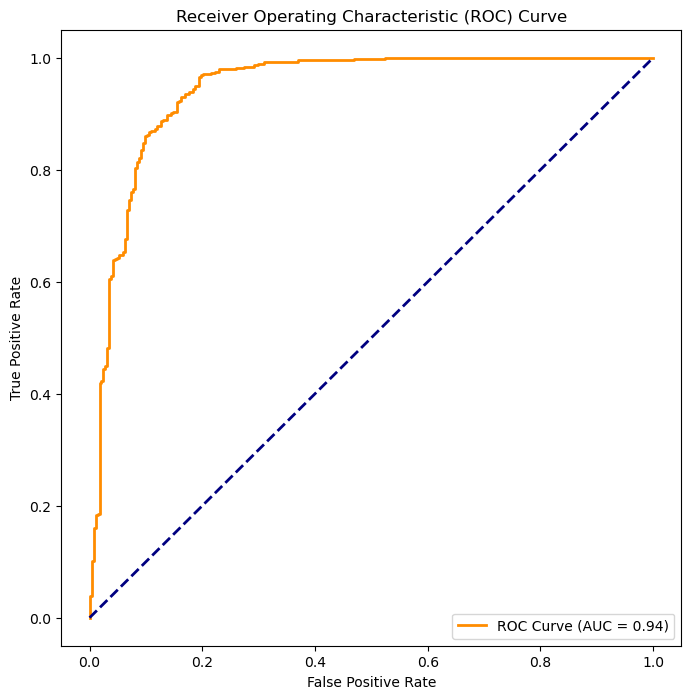

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_unlabeled, logistic_reg_model.predict_proba(X_unlabeled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

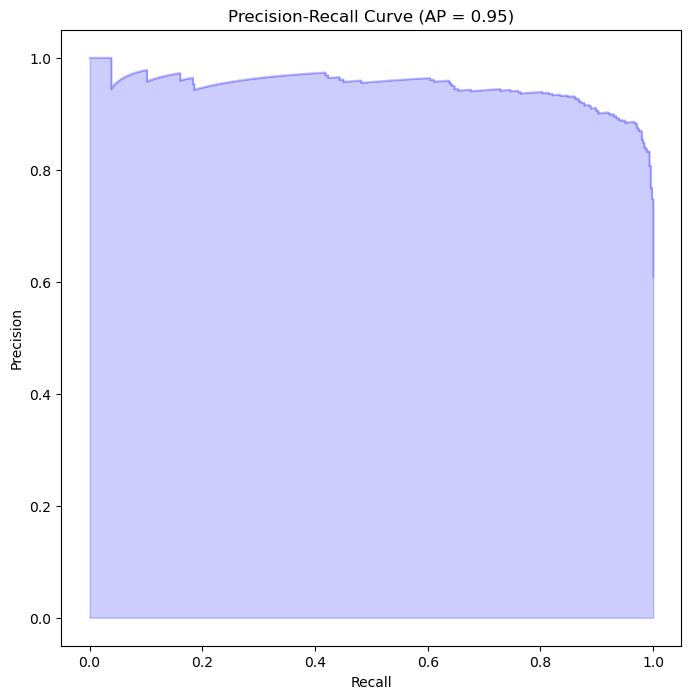

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_unlabeled, logistic_reg_model.predict_proba(X_unlabeled)[:, 1])
average_precision = average_precision_score(y_unlabeled, logistic_reg_model.predict_proba(X_unlabeled)[:, 1])

plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.show()

In [33]:
# Train CatBoost
catboost_model = CatBoostClassifier()
catboost_model.fit(X_labeled, y_labeled)

Learning rate set to 0.016242
0:	learn: 0.6783301	total: 2.44ms	remaining: 2.44s
1:	learn: 0.6644351	total: 4.98ms	remaining: 2.49s
2:	learn: 0.6473344	total: 7.35ms	remaining: 2.44s
3:	learn: 0.6355234	total: 9.54ms	remaining: 2.38s
4:	learn: 0.6211018	total: 11.6ms	remaining: 2.31s
5:	learn: 0.6078252	total: 13.7ms	remaining: 2.27s
6:	learn: 0.5958472	total: 15.7ms	remaining: 2.23s
7:	learn: 0.5823032	total: 17.8ms	remaining: 2.2s
8:	learn: 0.5704543	total: 20ms	remaining: 2.2s
9:	learn: 0.5567654	total: 22.1ms	remaining: 2.19s
10:	learn: 0.5456293	total: 24.1ms	remaining: 2.17s
11:	learn: 0.5330201	total: 26.2ms	remaining: 2.16s
12:	learn: 0.5234895	total: 28.4ms	remaining: 2.16s
13:	learn: 0.5130944	total: 30.5ms	remaining: 2.15s
14:	learn: 0.5019143	total: 32.6ms	remaining: 2.14s
15:	learn: 0.4926317	total: 34.6ms	remaining: 2.13s
16:	learn: 0.4848612	total: 36.7ms	remaining: 2.12s
17:	learn: 0.4778738	total: 38.8ms	remaining: 2.12s
18:	learn: 0.4707670	total: 40.9ms	remaining: 2.

186:	learn: 0.2228353	total: 404ms	remaining: 1.76s
187:	learn: 0.2225423	total: 407ms	remaining: 1.75s
188:	learn: 0.2221700	total: 409ms	remaining: 1.75s
189:	learn: 0.2219870	total: 411ms	remaining: 1.75s
190:	learn: 0.2216461	total: 413ms	remaining: 1.75s
191:	learn: 0.2213685	total: 415ms	remaining: 1.75s
192:	learn: 0.2209575	total: 417ms	remaining: 1.74s
193:	learn: 0.2206965	total: 419ms	remaining: 1.74s
194:	learn: 0.2204494	total: 421ms	remaining: 1.74s
195:	learn: 0.2200621	total: 424ms	remaining: 1.74s
196:	learn: 0.2197684	total: 426ms	remaining: 1.74s
197:	learn: 0.2193723	total: 428ms	remaining: 1.73s
198:	learn: 0.2191216	total: 430ms	remaining: 1.73s
199:	learn: 0.2189535	total: 432ms	remaining: 1.73s
200:	learn: 0.2187302	total: 434ms	remaining: 1.73s
201:	learn: 0.2184469	total: 436ms	remaining: 1.72s
202:	learn: 0.2180602	total: 438ms	remaining: 1.72s
203:	learn: 0.2178963	total: 440ms	remaining: 1.72s
204:	learn: 0.2177108	total: 442ms	remaining: 1.72s
205:	learn: 

370:	learn: 0.1839250	total: 804ms	remaining: 1.36s
371:	learn: 0.1838016	total: 806ms	remaining: 1.36s
372:	learn: 0.1836975	total: 808ms	remaining: 1.36s
373:	learn: 0.1834693	total: 810ms	remaining: 1.35s
374:	learn: 0.1832399	total: 812ms	remaining: 1.35s
375:	learn: 0.1830856	total: 815ms	remaining: 1.35s
376:	learn: 0.1828418	total: 817ms	remaining: 1.35s
377:	learn: 0.1827431	total: 819ms	remaining: 1.35s
378:	learn: 0.1826007	total: 822ms	remaining: 1.35s
379:	learn: 0.1825543	total: 824ms	remaining: 1.34s
380:	learn: 0.1822728	total: 826ms	remaining: 1.34s
381:	learn: 0.1821043	total: 828ms	remaining: 1.34s
382:	learn: 0.1820149	total: 830ms	remaining: 1.34s
383:	learn: 0.1817635	total: 833ms	remaining: 1.33s
384:	learn: 0.1814020	total: 835ms	remaining: 1.33s
385:	learn: 0.1812076	total: 837ms	remaining: 1.33s
386:	learn: 0.1810824	total: 839ms	remaining: 1.33s
387:	learn: 0.1809207	total: 842ms	remaining: 1.33s
388:	learn: 0.1807879	total: 844ms	remaining: 1.32s
389:	learn: 

548:	learn: 0.1540353	total: 1.2s	remaining: 985ms
549:	learn: 0.1538739	total: 1.2s	remaining: 984ms
550:	learn: 0.1537956	total: 1.2s	remaining: 982ms
551:	learn: 0.1536832	total: 1.21s	remaining: 979ms
552:	learn: 0.1535101	total: 1.21s	remaining: 977ms
553:	learn: 0.1534645	total: 1.21s	remaining: 975ms
554:	learn: 0.1532846	total: 1.21s	remaining: 973ms
555:	learn: 0.1529969	total: 1.22s	remaining: 971ms
556:	learn: 0.1529501	total: 1.22s	remaining: 969ms
557:	learn: 0.1528289	total: 1.22s	remaining: 966ms
558:	learn: 0.1527765	total: 1.22s	remaining: 964ms
559:	learn: 0.1526300	total: 1.22s	remaining: 962ms
560:	learn: 0.1524784	total: 1.23s	remaining: 959ms
561:	learn: 0.1523857	total: 1.23s	remaining: 957ms
562:	learn: 0.1523254	total: 1.23s	remaining: 955ms
563:	learn: 0.1522401	total: 1.23s	remaining: 953ms
564:	learn: 0.1521492	total: 1.23s	remaining: 950ms
565:	learn: 0.1519972	total: 1.24s	remaining: 948ms
566:	learn: 0.1519727	total: 1.24s	remaining: 946ms
567:	learn: 0.1

739:	learn: 0.1276310	total: 1.6s	remaining: 563ms
740:	learn: 0.1275584	total: 1.6s	remaining: 561ms
741:	learn: 0.1274201	total: 1.61s	remaining: 559ms
742:	learn: 0.1273379	total: 1.61s	remaining: 556ms
743:	learn: 0.1271939	total: 1.61s	remaining: 554ms
744:	learn: 0.1270820	total: 1.61s	remaining: 552ms
745:	learn: 0.1270274	total: 1.62s	remaining: 551ms
746:	learn: 0.1269224	total: 1.62s	remaining: 549ms
747:	learn: 0.1267675	total: 1.62s	remaining: 547ms
748:	learn: 0.1266094	total: 1.63s	remaining: 545ms
749:	learn: 0.1265830	total: 1.63s	remaining: 542ms
750:	learn: 0.1264461	total: 1.63s	remaining: 540ms
751:	learn: 0.1263106	total: 1.63s	remaining: 538ms
752:	learn: 0.1261894	total: 1.63s	remaining: 536ms
753:	learn: 0.1260780	total: 1.64s	remaining: 534ms
754:	learn: 0.1259438	total: 1.64s	remaining: 532ms
755:	learn: 0.1257381	total: 1.64s	remaining: 529ms
756:	learn: 0.1256139	total: 1.64s	remaining: 527ms
757:	learn: 0.1254874	total: 1.64s	remaining: 525ms
758:	learn: 0.

926:	learn: 0.1077437	total: 2s	remaining: 158ms
927:	learn: 0.1075888	total: 2s	remaining: 156ms
928:	learn: 0.1074891	total: 2.01s	remaining: 153ms
929:	learn: 0.1074304	total: 2.01s	remaining: 151ms
930:	learn: 0.1072763	total: 2.01s	remaining: 149ms
931:	learn: 0.1071798	total: 2.01s	remaining: 147ms
932:	learn: 0.1070030	total: 2.02s	remaining: 145ms
933:	learn: 0.1069132	total: 2.02s	remaining: 143ms
934:	learn: 0.1068164	total: 2.02s	remaining: 140ms
935:	learn: 0.1066686	total: 2.02s	remaining: 138ms
936:	learn: 0.1065837	total: 2.02s	remaining: 136ms
937:	learn: 0.1064884	total: 2.03s	remaining: 134ms
938:	learn: 0.1064663	total: 2.03s	remaining: 132ms
939:	learn: 0.1063413	total: 2.03s	remaining: 130ms
940:	learn: 0.1062878	total: 2.03s	remaining: 127ms
941:	learn: 0.1062436	total: 2.04s	remaining: 125ms
942:	learn: 0.1061298	total: 2.04s	remaining: 123ms
943:	learn: 0.1060006	total: 2.04s	remaining: 121ms
944:	learn: 0.1059579	total: 2.04s	remaining: 119ms
945:	learn: 0.1058

In [34]:
# Evaluate CatBoost
catboost_predictions = catboost_model.predict(X_unlabeled)
catboost_accuracy = accuracy_score(y_unlabeled, catboost_predictions)
print(f"CatBoost Accuracy: {catboost_accuracy}")

CatBoost Accuracy: 0.9077134986225895


In [35]:
rfc_X = df.drop("Target", axis=1)
rfc_y = df["Target"]
print(df["Target"])

rfc_X_labeled, rfc_X_unlabeled, rfc_y_labeled, rfc_y_unlabeled = train_test_split(rfc_X, rfc_y, test_size=0.2, random_state=42, stratify=rfc_y)

plt.rcParams['figure.figsize'] = 5,5
plt.rcParams['font.size'] = 10 

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64


In [36]:
print('X labeled: %d data points and %d features' % (rfc_X_labeled.shape))
print('X unlabeled: %d data points and %d features \n' % (rfc_X_unlabeled.shape))

print('y labeled: %d positive out of %d total' % (sum(rfc_y_labeled), len(rfc_y_labeled)))
print('y unlabeled: %d positive out of %d total' % (sum(rfc_y_unlabeled), len(rfc_y_unlabeled)))

X labeled: 2904 data points and 36 features
X unlabeled: 726 data points and 36 features 

y labeled: 1767 positive out of 2904 total
y unlabeled: 442 positive out of 726 total


X labeled: 2904 data points and 2 features
X unlabeled: 726 data points and 2 features 



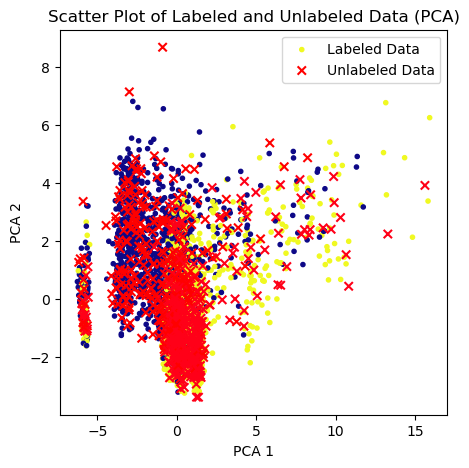

In [38]:
# due to how many features we have, we ought to scale the data first
scaler = StandardScaler()
rfc_X_labeled_scaled = scaler.fit_transform(rfc_X_labeled)
rfc_X_unlabeled_scaled = scaler.transform(rfc_X_unlabeled)

# PCA to reduce dimensionality
pca = PCA(n_components=2)
rfc_X_labeled_pca = pca.fit_transform(rfc_X_labeled_scaled)
rfc_X_unlabeled_pca = pca.transform(rfc_X_unlabeled_scaled)

print('X labeled: %d data points and %d features' % (rfc_X_labeled_pca.shape))
print('X unlabeled: %d data points and %d features \n' % (rfc_X_unlabeled_pca.shape))

# plot
plt.scatter(rfc_X_labeled_pca[:, 0], rfc_X_labeled_pca[:, 1], c=rfc_y_labeled, cmap='plasma', marker='.', label='Labeled Data')
plt.scatter(rfc_X_unlabeled_pca[:, 0], rfc_X_unlabeled_pca[:, 1], c=rfc_y_unlabeled, cmap='hsv', marker='x', label='Unlabeled Data')

plt.title('Scatter Plot of Labeled and Unlabeled Data (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

predictions on unlabeled data: 470 positive out of 726 total


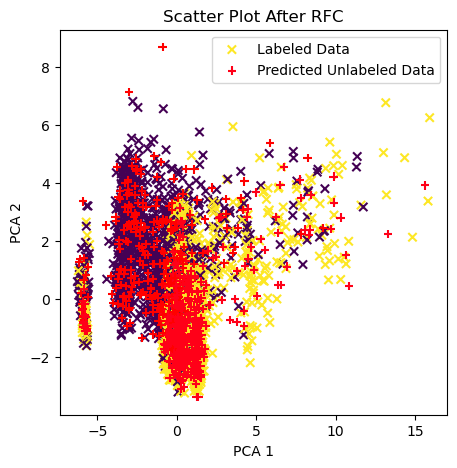

In [40]:
# training RFC
rf_classifier = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)
rf_classifier.fit(rfc_X_labeled_pca, rfc_y_labeled)

# predict on unlabeled
predictions = rf_classifier.predict(rfc_X_unlabeled_pca)

print('predictions on unlabeled data: %d positive out of %d total' % (sum(predictions), len(predictions)))

# plot predictions
plt.scatter(rfc_X_labeled_pca[:, 0], rfc_X_labeled_pca[:, 1], c=rfc_y_labeled, cmap='viridis', marker='x', label='Labeled Data')
plt.scatter(rfc_X_unlabeled_pca[:, 0], rfc_X_unlabeled_pca[:, 1], c=predictions, cmap='hsv', marker='+', label='Predicted Unlabeled Data')

plt.title('Scatter Plot After RFC')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [41]:
# calculate accuracy
accuracy = accuracy_score(rfc_y_unlabeled, predictions)
print('Accuracy:', accuracy)

# display confusion matrix
matrix = confusion_matrix(rfc_y_unlabeled, predictions)
print('Confusion Matrix:')
print(matrix)

# display classification report
report = classification_report(rfc_y_unlabeled, predictions)
print('Classification Report:')
print(report)

nmi = normalized_mutual_info_score(rfc_y_unlabeled, predictions)
print('NMI:', nmi)

Accuracy: 0.8099173553719008
Confusion Matrix:
[[201  83]
 [ 55 387]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.74       284
           1       0.82      0.88      0.85       442

    accuracy                           0.81       726
   macro avg       0.80      0.79      0.80       726
weighted avg       0.81      0.81      0.81       726

NMI: 0.2791450896246436


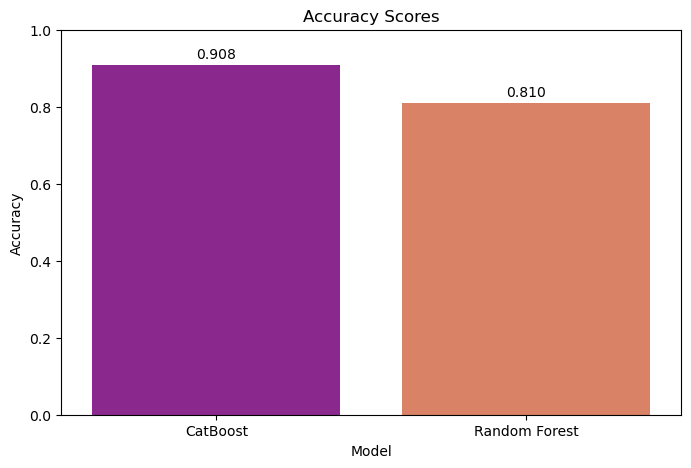

In [42]:
data = {'Model': ['CatBoost', 'Random Forest'],
        'Accuracy': [catboost_accuracy, accuracy]}

df_accuracy = pd.DataFrame(data)

# plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='plasma')

# show each bar's accuracy score
for index, value in enumerate(df_accuracy['Accuracy']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')
    
plt.ylim(0, 1)
plt.title('Accuracy Scores')
plt.show()

In [43]:
# read the dataset
df = pd.read_csv("interest.csv", encoding='utf-8-sig')
target_mapping = {'Dropout': 0, 'Enrolled': -1, 'Graduate': 1}

df['Target'] = df['Target'].map(target_mapping)
df = df[df['Target'] != -1]

df.head()

,Course,Curricular units 2nd sem (approved),Tuition fees up to date,Target
0,171,0,1,0
1,9254,6,0,1
2,9070,0,0,0
3,9773,5,1,1
4,8014,6,1,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 3629
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Course                               3630 non-null   int64
 1   Curricular units 2nd sem (approved)  3630 non-null   int64
 2   Tuition fees up to date              3630 non-null   int64
 3   Target                               3630 non-null   int64
dtypes: int64(4)
memory usage: 141.8 KB


In [45]:
rfc_X = df.drop("Target", axis=1)
rfc_y = df["Target"]

rfc_X_labeled, rfc_X_unlabeled, rfc_y_labeled, rfc_y_unlabeled = train_test_split(rfc_X, rfc_y, test_size=0.2, random_state=42, stratify=rfc_y)

In [46]:
scaler = StandardScaler()
rfc_X_labeled_scaled = scaler.fit_transform(rfc_X_labeled)
rfc_X_unlabeled_scaled = scaler.transform(rfc_X_unlabeled)

# PCA to reduce dimensionality
pca = PCA(n_components=2)
rfc_X_labeled_pca = pca.fit_transform(rfc_X_labeled_scaled)
rfc_X_unlabeled_pca = pca.transform(rfc_X_unlabeled_scaled)

In [47]:
# training RFC
rf_classifier = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)
rf_classifier.fit(rfc_X_labeled_pca, rfc_y_labeled)

# predict on unlabeled
predictions = rf_classifier.predict(rfc_X_unlabeled_pca)

X labeled: 2904 data points and 2 features
X unlabeled: 726 data points and 2 features 



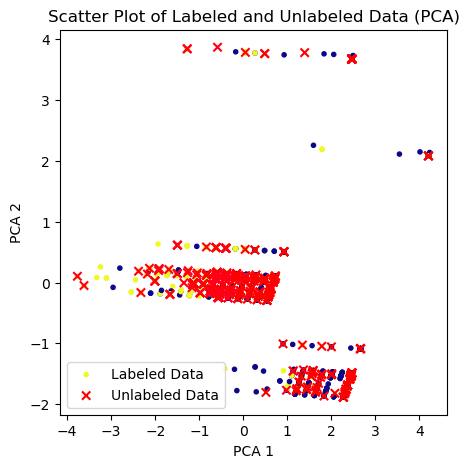

In [50]:
print('X labeled: %d data points and %d features' % (rfc_X_labeled_pca.shape))
print('X unlabeled: %d data points and %d features \n' % (rfc_X_unlabeled_pca.shape))

# plot
plt.scatter(rfc_X_labeled_pca[:, 0], rfc_X_labeled_pca[:, 1], c=rfc_y_labeled, cmap='plasma', marker='.', label='Labeled Data')
plt.scatter(rfc_X_unlabeled_pca[:, 0], rfc_X_unlabeled_pca[:, 1], c=rfc_y_unlabeled, cmap='hsv', marker='x', label='Unlabeled Data')

plt.title('Scatter Plot of Labeled and Unlabeled Data (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

predictions on unlabeled data: 491 positive out of 726 total


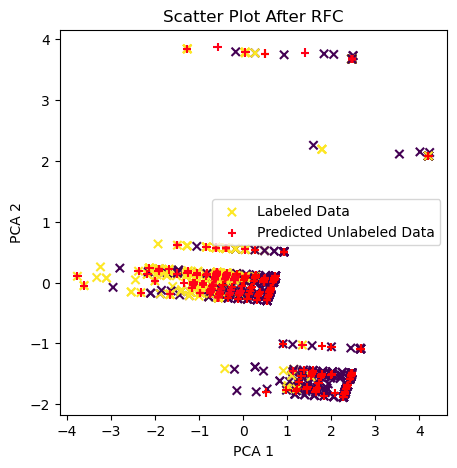

In [51]:
# training RFC
rf_classifier = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)
rf_classifier.fit(rfc_X_labeled_pca, rfc_y_labeled)

# predict on unlabeled
predictions = rf_classifier.predict(rfc_X_unlabeled_pca)

print('predictions on unlabeled data: %d positive out of %d total' % (sum(predictions), len(predictions)))

# plot predictions
plt.scatter(rfc_X_labeled_pca[:, 0], rfc_X_labeled_pca[:, 1], c=rfc_y_labeled, cmap='viridis', marker='x', label='Labeled Data')
plt.scatter(rfc_X_unlabeled_pca[:, 0], rfc_X_unlabeled_pca[:, 1], c=predictions, cmap='hsv', marker='+', label='Predicted Unlabeled Data')

plt.title('Scatter Plot After RFC')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [52]:
# calculate accuracy
accuracy = accuracy_score(rfc_y_unlabeled, predictions)
print('Accuracy:', accuracy)

# display confusion matrix
matrix = confusion_matrix(rfc_y_unlabeled, predictions)
print('Confusion Matrix:')
print(matrix)

# display classification report
report = classification_report(rfc_y_unlabeled, predictions)
print('Classification Report:')
print(report)

nmi = normalized_mutual_info_score(rfc_y_unlabeled, predictions)
print('NMI:', nmi)

Accuracy: 0.8939393939393939
Confusion Matrix:
[[221  63]
 [ 14 428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       284
           1       0.87      0.97      0.92       442

    accuracy                           0.89       726
   macro avg       0.91      0.87      0.88       726
weighted avg       0.90      0.89      0.89       726

NMI: 0.518982844120032


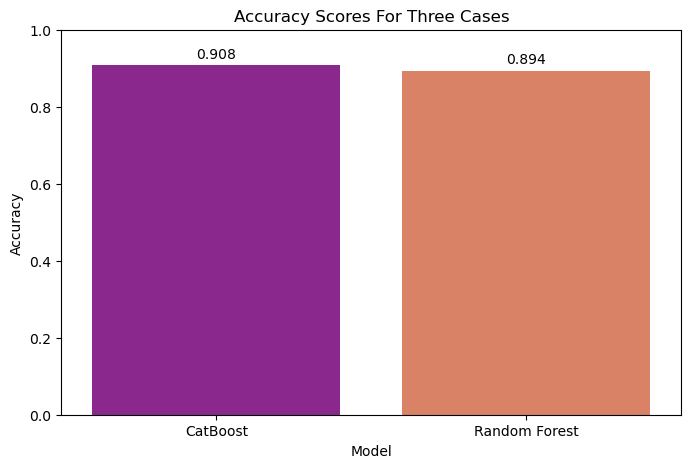

In [53]:
data = {'Model': ['CatBoost', 'Random Forest'],
        'Accuracy': [catboost_accuracy, accuracy]}

df_accuracy = pd.DataFrame(data)

# plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='plasma')

# show each bar's accuracy score
for index, value in enumerate(df_accuracy['Accuracy']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')
    
plt.ylim(0, 1)
plt.title('Accuracy Scores For Three Cases')
plt.show()